# Exploring Factor That Influences APR in a Loan through Prosper Dataset
## by Jason Sujaya

## Investigation Overview

Prosper is one of the earliest lending platform established in the United States. Being able to receive loan plays a significant part in improving businesses and helping people in their life ! APR is percetage measurement which refers to the annual cost of a loan to a borrower. This means the higher the APR of a loan, the more the person who takes the loan will have to pay. The main purposes of this project is to explore and discover the features that can affect the APR through the Prosper Dataset. Through multiple variables using summary statistics and data  visualizations, we'll summarize what feature to be aware of if we want to receive better APR.


## Dataset Overview

> This data set contains 113,937 loans with 81 variables ranging from APR, the amount of loan being created, scoring mechanism, type of jobs, etc.

In [99]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [100]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("prosperLoanData.csv")
df.head()

# Selecting Columns We Are Interested in
interest_column = ['LoanStatus','Occupation','LoanOriginalAmount','ListingCategory (numeric)', 'BorrowerAPR', 'StatedMonthlyIncome', 'MonthlyLoanPayment', 'Term','ProsperRating (Alpha)','EmploymentStatus', "ProsperScore", "CreditGrade"]
loan = df[interest_column]

# Convert into categorical data
rate = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rate)
loan['ProsperRating (Alpha)'] = loan['ProsperRating (Alpha)'].astype(ordered_var)

# Removing missing information
loan = loan[~loan.BorrowerAPR.isna()]
loan = loan[~loan.ProsperScore.isna()]
loan["CreditGrade"].fillna("None", inplace=True)
loan["EmploymentStatus"].fillna("Null", inplace=True)
loan["Occupation"].fillna("None", inplace=True)


#Checks for null value
loan.isnull().sum();

# Setup Color
color1 = sb.color_palette()[0];

## Univariate Plots Section

Explore the distribution and characteristic of interesting variables!

### 1. The monthly income distribution
The APR distribution in the dataset seems to be multimodal within the range of 0.5% to 4%. 

NOTE : To give a better more detailed view of the distribution, I created a more detailed version of the chart with more bins.

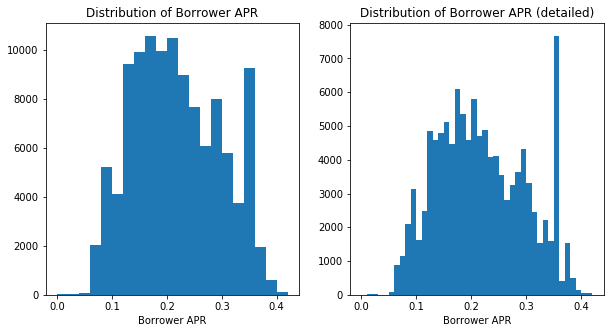

In [101]:
#Plot Borrower APR
plt.figure(figsize = [10, 5])
plt.subplot(1, 2, 1)
bins = np.arange(0, loan["BorrowerAPR"].max(), 0.02)
sb.distplot(df['BorrowerAPR'], bins = bins, kde = False, hist_kws = {'alpha' : 1}, color=color1)
plt.xlabel('Borrower APR');
plt.title('Distribution of Borrower APR');

plt.subplot(1, 2, 2)
bins = np.arange(0, loan["BorrowerAPR"].max(), 0.01)
sb.distplot(df['BorrowerAPR'], bins = bins, kde = False, hist_kws = {'alpha' : 1}, color=color1)
plt.xlabel('Borrower APR');
plt.title('Distribution of Borrower APR (detailed)');

### 2. The monthly income distribution
The StatedMonthlyIncome is highly right skewed. Without any operation on the data, there's a few outliers withe really huge monthly income which could be true but could likely be an error in the data entry as it don't reflect the amount of loan that person borrows (ussually less than 10k). The majority of the income now lies below 30k.

NOTE : I removed the top 0.1% of the loan using np.percentile function as without it, there's a huge outlier to the right which likely could be a data entry error!

In [102]:
loan = loan[loan["StatedMonthlyIncome"]<np.percentile(loan.StatedMonthlyIncome,99.9)]

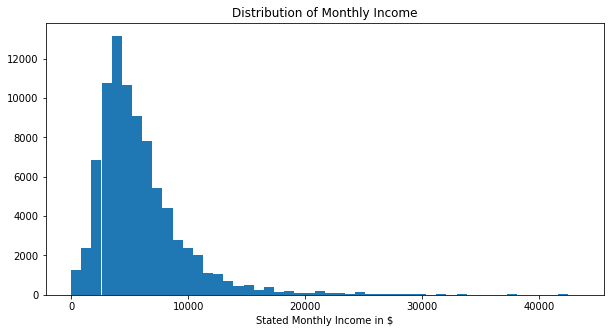

In [104]:
#Monthly Income
plt.figure(figsize=(10,5))
sb.distplot(loan["StatedMonthlyIncome"],kde = False, hist_kws = {'alpha' : 1}, color=color1);
plt.xlabel('Stated Monthly Income');
plt.title('Distribution of Monthly Income');
plt.xlabel('Stated Monthly Income in $');

### 3. Terms in the dataset
A significant amount of loan areissued in 36 month, followed by 60 month and 12 month being the least.

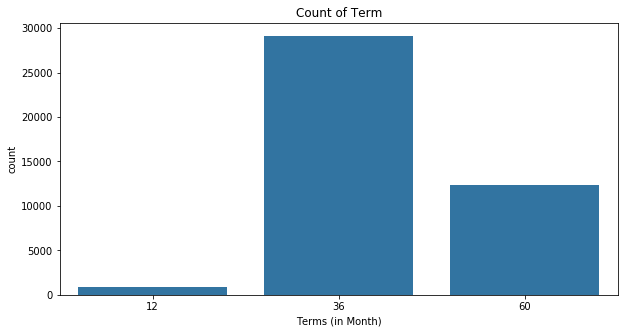

In [105]:
plt.figure(figsize=(10,5))
top_occupation = (loan['Occupation'].value_counts()> 1000).index[1:15]
top_loan = loan[loan["Occupation"].isin(top_occupation)]
sb.countplot(data=top_loan, x = "Term", color=color1);
plt.title('Count of Term');
plt.xlabel('Terms (in Month)');

### 4. Differences in Prosper Features
There seems to be some differences in the distribution of the prosper features. Therefore it's worth to look at this in the next section

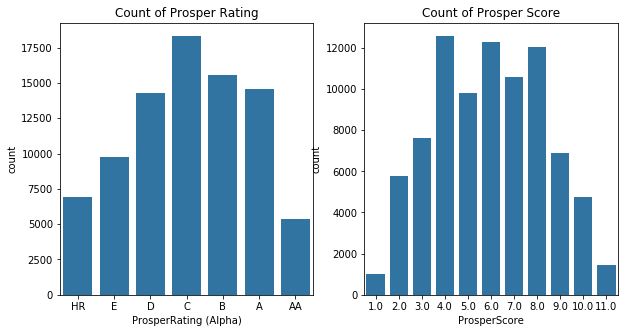

In [68]:
plt.figure(figsize = [10, 5])
plt.subplot(1, 2, 1)
sb.countplot(data=loan, x="ProsperRating (Alpha)", color=color1);
plt.title('Count of Prosper Rating');

plt.subplot(1, 2, 2)
sb.countplot(data=loan, x="ProsperScore", color=color1);
plt.title('Count of Prosper Score');

## Bivariate Exploration

Explore the relationship between 2 variables to understand how APR is influenced

In [69]:
numeric_vars = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome', 'MonthlyLoanPayment', 'ListingCategory (numeric)', 'ProsperScore']
categoric_vars = ['LoanStatus', 'Occupation', 'Term', 'ProsperRating (Alpha)', 'EmploymentStatus', 'CreditGrade']

### 5. Plotting an overview
Before we proceed, it's best to look at an overview of different variable relationship. In this case, we run plot matrix. We can discover that Loan Amount and Monthly Payment Seems to have a relationship. The rest aren't easy to see visually. Especially for the APR feature, we need to see the correlation to investigate further!

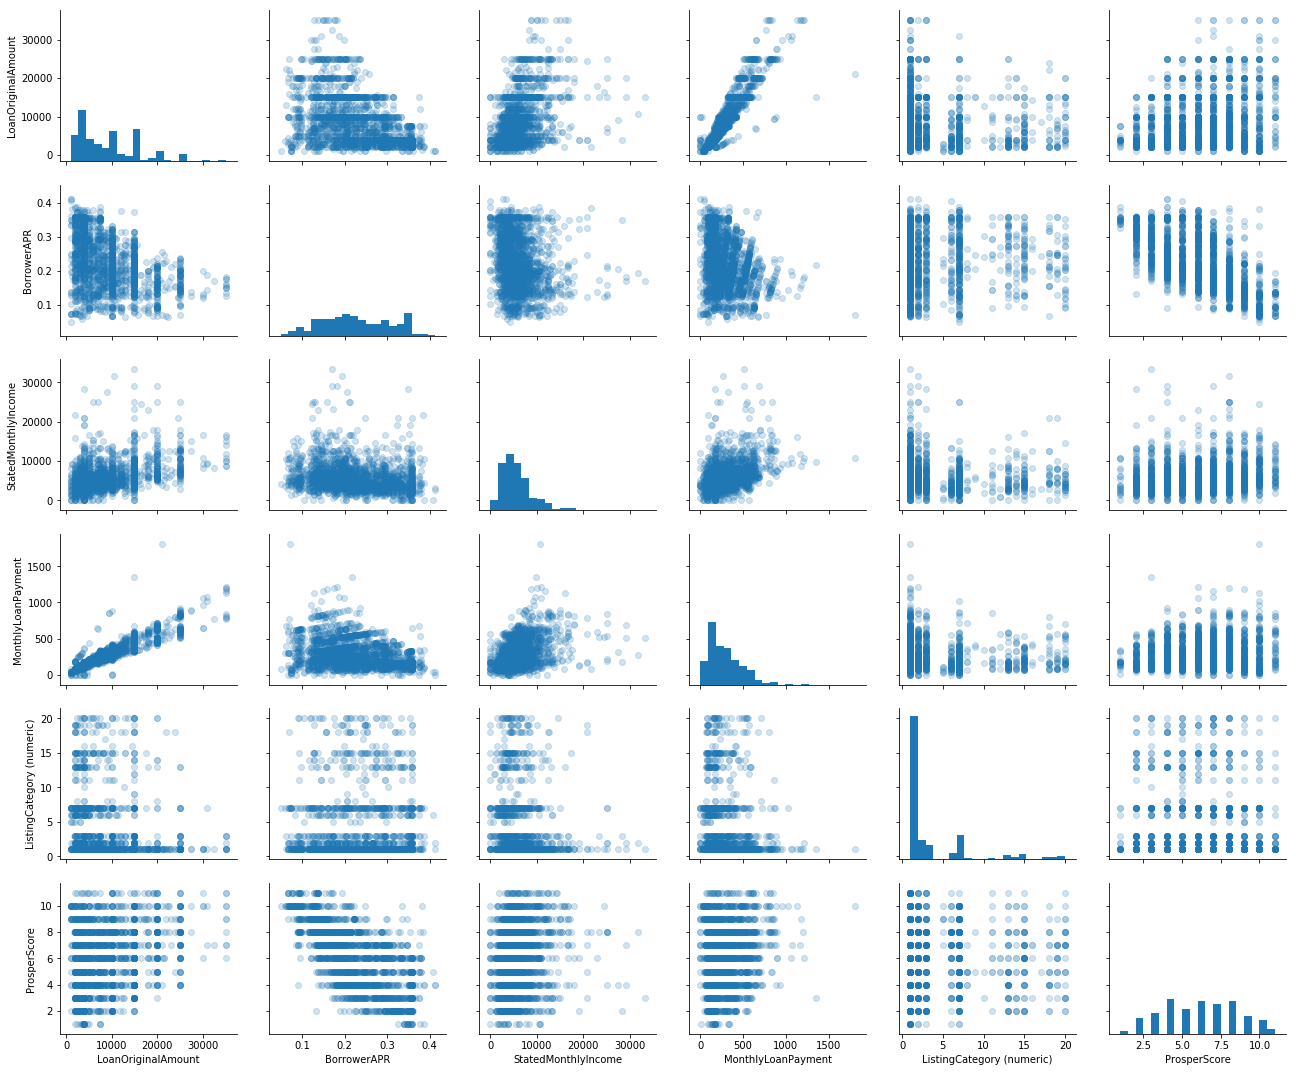

In [159]:
# Plot the Matrix : sample 2k loans so that plots are clearer and render faster
loan_samp = loan.sample(2000)
g = sb.PairGrid(data = loan_samp, vars = numeric_vars, aspect=1.2);
g = g.map_diag(plt.hist, bins=20);
g.map_offdiag(plt.scatter, alpha=0.2);

##### 6. Correlation Matrix

From the scatter plot, there are several visualization that catches my attention. However it's best understand if those points of interest are relevatnt through the correlation coeficient!

When we observe the correlation between the APR and Loan Original amount, we can see that it is negatively correlated at -0.323. This means that the higher the amount of the loan that is given, the more likely the Loan has lower APR. In the multivariate exploration, we will be able to perhaps check another feature and see if there are any variable that create more insight toward the matter of high vs low APR

There borrower's APR and Propser score seems to have some correlation as stated with (-0.668). This means that the a significant portion of APR are decided based on prosper score

<Figure size 720x360 with 0 Axes>

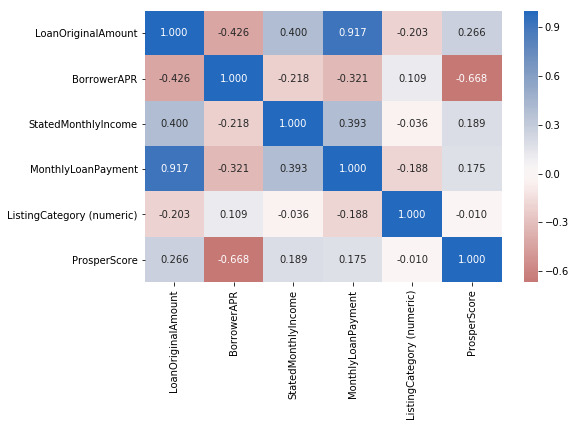

In [110]:
# Display The Correlation matrix using a heatmap
plt.figure(figsize=(10,5))
plt.figure(figsize = [8, 5])
sb.heatmap(loan[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

### 7. Assesing APR vs ProsperScore

Further visualization of the relationship between APR and ProsperScore with the heatplot map shows concertation of higher score (like 8) with low apr amount ranging from 0.10 and 0.15

In other areas, those with lower propser score such as 4 are likley to see an APR rating between 0.20 and 0.25

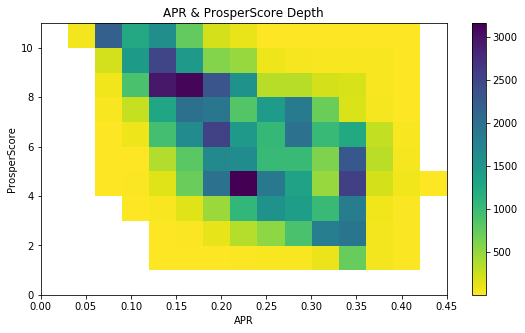

In [115]:
# Heat plot for ProsperScore and APR. 
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 2)
bins_x = np.arange(0, loan['BorrowerAPR'].max()+0.05, 0.03)
bins_y = np.arange(0, loan['ProsperScore'].max()+1, 1)
plt.hist2d(data = loan, x = 'BorrowerAPR', y = 'ProsperScore', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5);

plt.colorbar()
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('APR')
plt.ylabel('ProsperScore');
plt.title('APR & ProsperScore Depth');

### 8. Involving APR with categorical variable

The plot matrix further verify that prosper related feature (as shown through prosper rating) have a significant impact on the APR. As we can observer, AA prosper rating and A have a lower APR score, compared to those with D or E ratings. Prosper rating seems to be determined by the amount of monthly income.

Employent status also seems to impact the APR range as those who are retired, unemployed or doing part time have generally higher APR range and have higher max APR compared to the rest of the group.

User who borrow with longer term (60) have a smaller boxplot in their APR range (between 0.25 - 01.5) compared to those who borrow in shorter term. Interesting a 36 month terms seems to have higher APR compared to a 12 month term.


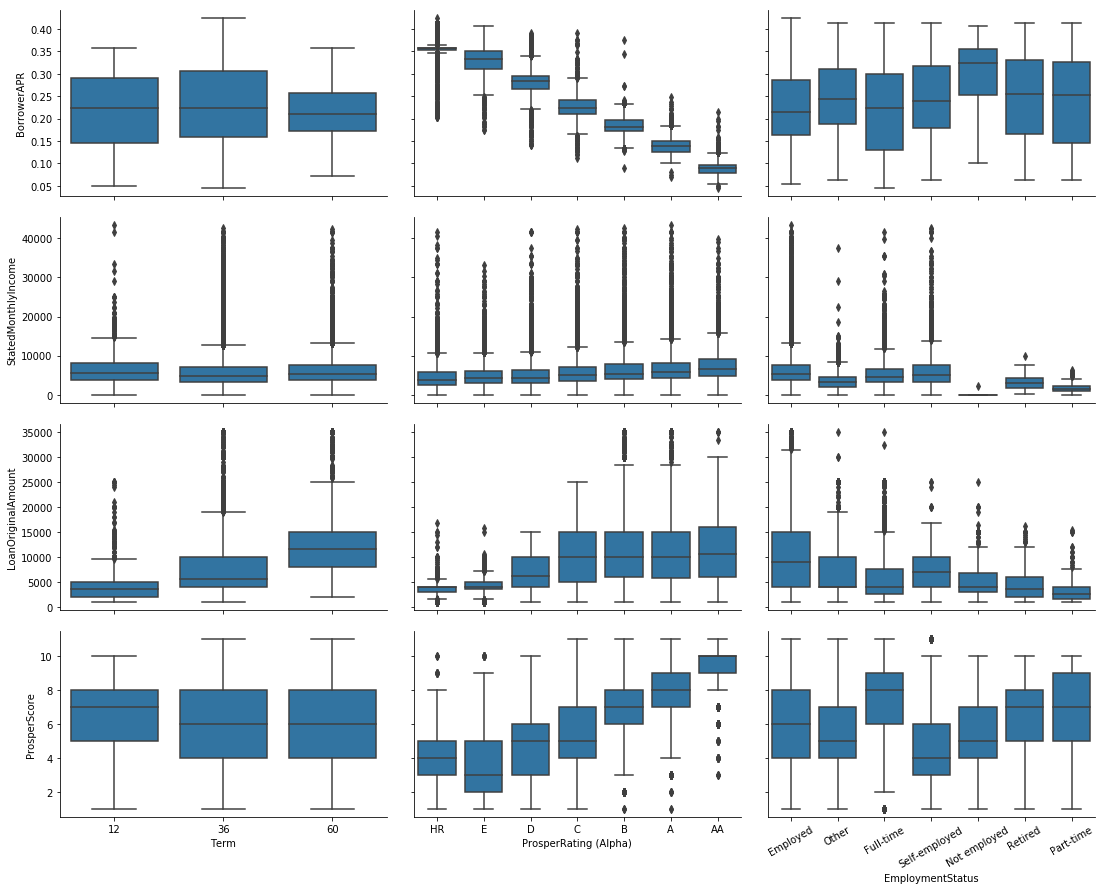

In [150]:
# plot matrix of numeric features against categorical features.
def boxgrid(x, y, **kwargs):
    sb.boxplot(x, y, color = color1);
    
g = sb.PairGrid(data = loan, y_vars = ['BorrowerAPR', 'StatedMonthlyIncome', 'LoanOriginalAmount', "ProsperScore"], 
                x_vars = ["Term", "ProsperRating (Alpha)", "EmploymentStatus"], size = 3, aspect=1.7);
g.map(boxgrid);
plt.xticks(rotation=30);

## Multivariate Exploration

Strengthening key insights by adding a third variable

### 9. Combining APR, Loan Original Amount & Prosper Rating

If we first asses the relationship between the loan original amount and borrower's APR while categorizing them with PropserRating Categroy, we can observe there is clear categroy of how Propser Rating impact the amount of APR in relation to the amount of loan. User who have high ProsperRating are likely to receive lower APR acrross the different range of loan amount. 

Further people with prosper rating below the C level are likely going to have lower amounts of loans with higher APR for those loans. What is interesting is that there doesn't seem to be a lot of high prosper rating amongst these low loan amounts.

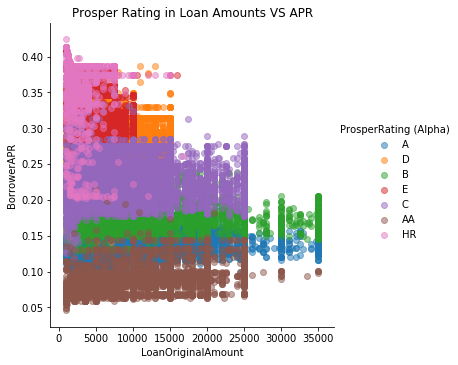

In [151]:
g = sb.FacetGrid(data = df, hue = 'ProsperRating (Alpha)', height = 5)
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerAPR', alpha=0.5)
g.add_legend();
plt.title('Prosper Rating in Loan Amounts VS APR');

### 10. Breaking Down Prosper Rating

Using FacetGrid, we can visualize the relationship between ProsperScore and APR with different category of ProsperRating. As we've analzyed in the bivariate exploration, we can confirm our initial hypothesis that lowerest rating(HR) of borrowers have the highest APR. For high rating A(A), the borrowers has the lowers APR. It seems like the ProsperRating Category do have some diferences in the score that they put but the overall distribution falls aproximately as we expect (higher rating = higher score)

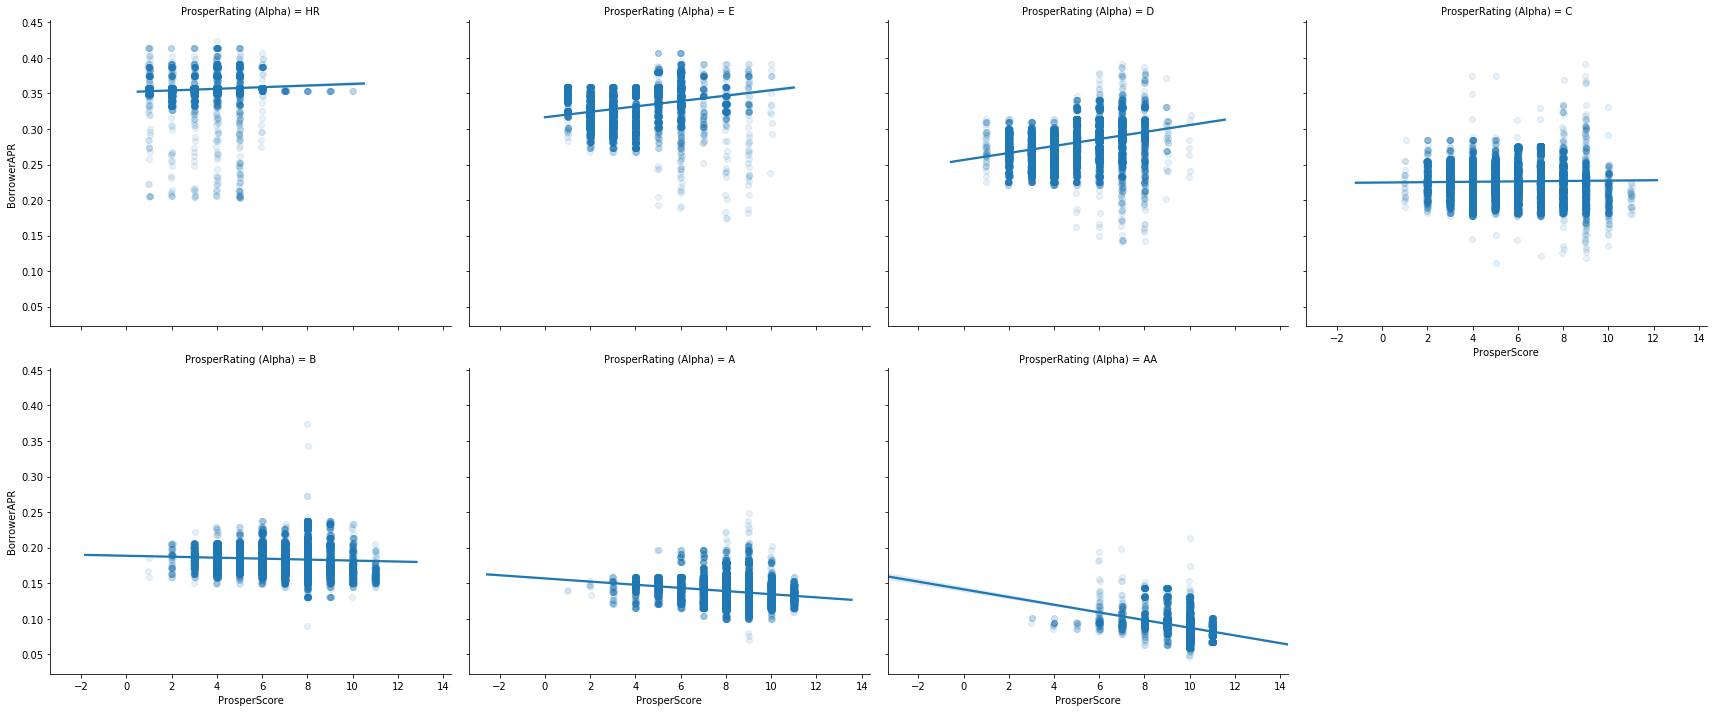

In [79]:
g=sb.FacetGrid(data=loan, aspect=1.2, height=5, col='ProsperRating (Alpha)', col_wrap=4)
g.map(sb.regplot, 'ProsperScore', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

### 11. Looking Through Employment Status

Another interesting relationship to asses how prosper rating are distributed between employment status. Somehow, AA part timers seems to have the lowest borower APR while having HR part timers have the highest APR.

The best of the unemployed (A) seems to have a highest APR rating compared to the rest with alot of variation comparred to other group categories

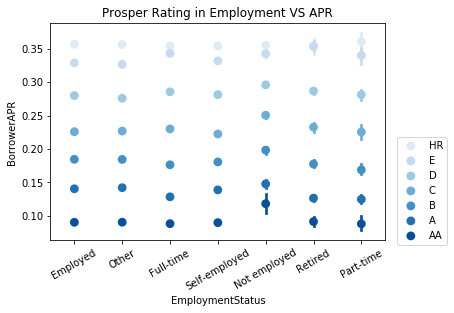

<Figure size 720x360 with 0 Axes>

In [120]:
sb.pointplot(data = loan, x = 'EmploymentStatus' , y = 'BorrowerAPR', hue ='ProsperRating (Alpha)',
           palette = 'Blues', linestyles = '').legend(bbox_to_anchor=(1.2, 0.5))

plt.xticks(rotation=30);
plt.title('Prosper Rating in Employment VS APR');
plt.figure(figsize=(10,5));

# CONCLUSION

To conclude, the APR rate that prosper dataset have are highly influenced by the prosper related variable such as the Prosperscore or the ProsperRating. While the internal formula of how prosper score/rating are calculated are unkown, we've observed some relationship betwee prosper variable with employment status. Further analysis on the prosperscore relationship with other variable would need to be done to make concrete reccomendation to anyone looking to have low APR on their loans if they go through prosper!


## Key Limitation 
This EDA is a good way to know the data's visualizations. To make any concrete statement, we need to conduct statistical test and  build predictive models.



> If you are interested to view the presentation, you could run the following line in the terminal
> jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle